<a href="https://colab.research.google.com/github/caalopez/Probabilidad-Estadistica/blob/main/Primer_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import plotly.graph_objects as go

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go

# **Exploracion de Datos**


In [73]:
url= "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/AER/CASchools.csv"

In [74]:
datos=pd.read_csv(url)

In [75]:
datos

,rownames,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,Las Lomitas Elementary,San Mateo,KK-08,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,700.900024,707.700012
416,417,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,704.000000,709.500000
417,418,72611,Somis Union Elementary,Ventura,KK-08,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,648.299988,641.700012
418,419,72744,Plumas Elementary,Yuba,KK-08,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,667.900024,676.500000


# **Limpieza del Database**

In [76]:
datos.fillna(0, inplace=True)

# Verificar si se realizaron cambios comparando con los datos originales
cambios_realizados = not datos.equals(pd.read_csv(url))

# Imprimir el resultado y si se hicieron cambios o no
#print(datos)

if cambios_realizados:
    print("Se realizaron cambios.")
else:
    print("No se realizaron cambios.")

No se realizaron cambios.


In [77]:
# Ciclo for para buscar si hay datos vacios (Arreglar)
for i in datos:
  if i== None:
    i= 0
    print("Vacio")
  else:
    print("DATABE SIN NONE")


DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE
DATABE SIN NONE


In [78]:
datos.columns

Index(['rownames', 'district', 'school', 'county', 'grades', 'students',
       'teachers', 'calworks', 'lunch', 'computer', 'expenditure', 'income',
       'english', 'read', 'math'],
      dtype='object')

In [79]:
#Los datos dados para el número de profesores aparece como una cantidad con decimales cosa que no tiene mucho sentido ya que hablamos de personas, y cuando contamos personas
#son cantidades que dan como reultados valor dentro de los enteros. Creamos un código que corrija eso.

# url= "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/AER/CASchools.csv"
# datos=pd.read_csv(url)
datos.teachers=datos.teachers.round()
datos.calworks=datos.calworks.round()
datos.lunch=datos.lunch.round()
datos.expenditure=datos.expenditure.round()
datos.income=datos.income.round()
# print(datos)

In [80]:
datos

,rownames,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,11.0,1.0,2.0,67,6385.0,23.0,0.000000,691.599976,690.000000
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.0,15.0,48.0,101,5099.0,10.0,4.583333,660.500000,661.900024
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,83.0,55.0,76.0,169,5502.0,9.0,30.000002,636.299988,650.900024
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.0,36.0,77.0,85,7102.0,9.0,0.000000,651.900024,643.500000
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,72.0,33.0,78.0,171,5236.0,9.0,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,Las Lomitas Elementary,San Mateo,KK-08,984,60.0,0.0,4.0,195,7290.0,29.0,5.995935,700.900024,707.700012
416,417,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.0,1.0,2.0,721,5741.0,42.0,4.726101,704.000000,709.500000
417,418,72611,Somis Union Elementary,Ventura,KK-08,441,20.0,4.0,37.0,45,4403.0,24.0,24.263039,648.299988,641.700012
418,419,72744,Plumas Elementary,Yuba,KK-08,101,5.0,12.0,59.0,14,4776.0,10.0,2.970297,667.900024,676.500000


# **Descripción del conjunto de datos**


El conjunto de datos contiene datos sobre el desempeño en las pruebas, las características de las escuelas y los antecedentes demográficos de los estudiantes de los distritos escolares de California.

Contiene alrededor de 420 observaciones sobre 14 variables (3 categoricas y las demas cuantitavias)  

*Los datos utilizados aquí provienen de los 420 distritos K-6 y K-8 en California con datos disponibles para 1998 y 1999. Los puntajes de las pruebas corresponden a la prueba estandarizada Stanford 9 administrada a estudiantes de quinto grado. Las características de la escuela (promediadas en todo el distrito) incluyen la inscripción, la cantidad de maestros, la cantidad de computadoras por colegio y los gastos por estudiante. Las variables demográficas incluyen el porcentaje de estudiantes en el programa de asistencia pública CalWorks, el porcentaje de estudiantes que califican para un almuerzo a precio reducido y el porcentaje de estudiantes que aprenden inglés (es decir, estudiantes para quienes el inglés es su segundo idioma).*

A continuacion esxplicamos las variables cuantitavias demostradas por medio de identificación de valores enteros y diferenciando los flotantes.

**TIPOS DE VARIABLES**


*   VARIABLES CUALITATIVAS NOMINALES (sin números y sin orden)
    - Schhool (Nombre de la escuela)
    - Country (factor que indica el condado)
    - Grades (indicando el rango de grados del distrito)

*    VARIABLES CUANTITATIVA CONTINUAS (que pueden asumir un numero incontable y decimales en sus valores )
    - Students  (Numero de estudaintes en la escuela)      
    - Teachers   (numero de profesores de tiempo completo )      
     - Calworks   (Porcentaje que califica para CalWorks (asistencia a los ingresos))     
    - Lunch       (Porcentaje que califica para almuerzo a precio reducido)    
    - Computer    (Numero de computadores por institución)    
    - Expenditure  (Gasto por estudiante)   
    - Income     (Ingreso promedio distrital (en USD 1.000))     
    - English     (Porcentaje de estudiantes de inglés)    
    - Read     (Puntaje promedio en lectura)       
    - Math     (Puntaje promedio en Matematicas)

*   VARIABLES CUANTITATIVAS DISCRETAS (NUMEROS ENTEROS)
  - District     (Código de distrito)



In [81]:
#Variable num = a todos los flotantes o int (numeros)
num = (datos.dtypes == float) | (datos.dtypes == int)
num

rownames        True
district        True
school         False
county         False
grades         False
students        True
teachers        True
calworks        True
lunch           True
computer        True
expenditure     True
income          True
english         True
read            True
math            True
dtype: bool

Las variables schhool, country, Grades son las variables categoricas
Las variables cuantiativas0 son
  -Unnamed
  -distric
  -students
  -teachers
  -calcworks
  -launch
  -computer
  -expenditure
  -income
  -english
  -read
  -math.  

# **Resumen estadísticos detallado**

In [82]:
datos.describe()

,rownames,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,67472.809524,2628.792857,129.057143,13.238095,44.714286,303.383333,5312.383333,15.326190,15.768155,654.970477,653.342619
std,121.387808,3466.994655,3913.104985,187.918371,11.441268,27.143555,441.341298,633.930135,7.230325,18.285927,20.107980,18.754202
min,1.000000,61382.000000,81.000000,5.000000,0.000000,0.000000,0.000000,3926.000000,5.000000,0.000000,604.500000,605.400024
25%,105.750000,64307.750000,379.000000,19.750000,4.000000,23.000000,46.000000,4906.000000,11.000000,1.940807,640.400024,639.375015
50%,210.500000,67760.500000,950.500000,48.500000,11.000000,41.500000,117.500000,5214.500000,14.000000,8.777634,655.750000,652.449982
75%,315.250000,70419.000000,3008.000000,146.000000,19.000000,67.000000,375.250000,5601.750000,18.000000,22.970003,668.725006,665.849991
max,420.000000,75440.000000,27176.000000,1429.000000,79.000000,100.000000,3324.000000,7712.000000,55.000000,85.539719,704.000000,709.500000


### **Seleccionamos las tres variables cuantitativas y dos categoricas a trabajar**

In [83]:
seleccion= datos[["grades", "county", "students", "teachers", "computer"]]
seleccion

,grades,county,students,teachers,computer
0,KK-08,Alameda,195,11.0,67
1,KK-08,Butte,240,11.0,101
2,KK-08,Butte,1550,83.0,169
3,KK-08,Butte,243,14.0,85
4,KK-08,Butte,1335,72.0,171
...,...,...,...,...,...
415,KK-08,San Mateo,984,60.0,195
416,KK-08,Santa Clara,3724,208.0,721
417,KK-08,Ventura,441,20.0,45
418,KK-08,Yuba,101,5.0,14


In [84]:
# Descripcion general de la selección
seleccion.describe()

,students,teachers,computer
count,420.000000,420.000000,420.000000
mean,2628.792857,129.057143,303.383333
std,3913.104985,187.918371,441.341298
min,81.000000,5.000000,0.000000
25%,379.000000,19.750000,46.000000
50%,950.500000,48.500000,117.500000
75%,3008.000000,146.000000,375.250000
max,27176.000000,1429.000000,3324.000000


# **Análisis de frecuencia de las variables cualitativas**

In [85]:
# Procentaje de Incidencia para Conty
##Necesitamos estos datos para poder visualizar la distrubicion de los datos cualitativos

w = seleccion["county"].value_counts()
lista_c1=list(w.index)
x = w.values
lis_in1 = []
for i in range(len(lista_c1)):
  z = x[i]/420
  z = z*100
  z = round(z,2)
  lis_in1.append(z)

#  print("La tasa de incidencia del estado de " + str(lista_c1[i]) + " es: " + str(z) + " %" )
#print("")

In [86]:
# Porcentaje incidencia Grades
##Necesitamos estos datos para poder visualizar la distrubicion de los datos cualitativos
t = seleccion["grades"].value_counts()
lista_c2=list(t.index)
x = t.values
lis_in2 = []
for i in range(len(lista_c2)):
  z = x[i]/420
  z = z*100
  z = round(z,2)
  lis_in2.append(z)

  print("La tasa de incidencia del estado de " + str(lista_c2[i]) + " es: " + str(z) + " %" )
print("")

La tasa de incidencia del estado de KK-08 es: 85.48 %
La tasa de incidencia del estado de KK-06 es: 14.52 %



# **Análisis de las variables cuantitativas**



In [87]:
# Media
datos2= seleccion[[ "students", "teachers", "computer"]] # elegimos un db con valores cuantitativos
mean= datos2.mean()
mean

students    2628.792857
teachers     129.057143
computer     303.383333
dtype: float64

In [88]:
# Mediana
median= datos2.median()
median

students    950.5
teachers     48.5
computer    117.5
dtype: float64

In [89]:
# Calculo de Moda
stats.mode(datos2)

<ipython-input-89-1bd7797314a8>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(datos2)


ModeResult(mode=array([[160.,   8.,  50.]]), count=array([[ 3, 13, 10]]))

In [90]:
varianza= datos2.var()
varianza= varianza.round()
varianza

students    15312391.0
teachers       35313.0
computer      194782.0
dtype: float64

In [91]:
 # Calculo de Varianza y Desviacion Estandar. PANDAS!

desviacion_estandar_A = datos2.std()
desviacion_estandar_A

students    3913.104985
teachers     187.918371
computer     441.341298
dtype: float64

In [92]:
# Calculo de Varianza y Desviacion Estandar NUMPY

varianza2 = np.var(datos2, ddof=0)
desviacion_estandar = np.sqrt(varianza2)
desviacion_estandar

students    3908.443750
teachers     187.694525
computer     440.815579
dtype: float64

In [93]:
# Cuartiles students

media_estudiantes= datos2["students"].mean()
percentil_75 = np.percentile(datos2["students"], 75)

# Rango intercuartil (Q3-Q1)
q1= np.percentile(datos2["students"], 25)
q3= np.percentile(datos2["students"], 75)
rango1= q3-q1

# valor_min_atipico = q1 - 1.5 * rango1
# valor_max_atipico = q3 + 1.5 * rango1

print("Media", media_estudiantes)
print("Percentil 75:", percentil_75)
print("Rango intercuartil:", rango1)
#print("Valores atípicos:", [valor for valor in datos2["students"] if valor < valor_min_atipico or valor > valor_max_atipico])


Media 2628.792857142857
Percentil 75: 3008.0
Rango intercuartil: 2629.0


In [94]:
# percentil_25 = seleccion['students'].quantile(0.25)
# percentil_25 = seleccion['students'].quantile(0.70)

In [95]:
# Cuartiles teachers

media_teachers= datos2["teachers"].mean()
percentil_75 = np.percentile(datos2["teachers"], 75)

# Rango intercuartil (Q3-Q1)
q1= np.percentile(datos2["teachers"], 25)
q3= np.percentile(datos2["teachers"], 75)
rango2= q3-q1

# valor_min_atipico = q1 - 1.5 * rango2
# valor_max_atipico = q3 + 1.5 * rango2

print("Media", media_teachers)
print("Percentil 75:", percentil_75)
print("Rango intercuartil:", rango2)
#print("Valores atípicos:", [valor for valor in datos2["teachers"] if valor < valor_min_atipico or valor > valor_max_atipico])


Media 129.05714285714285
Percentil 75: 146.0
Rango intercuartil: 126.25


In [96]:
# Cuartiles computer

media_computer= datos2["computer"].mean()
percentil_75 = np.percentile(datos2["computer"], 75)

# Rango intercuartil (Q3-Q1)
q1= np.percentile(datos2["computer"], 25)
q3= np.percentile(datos2["computer"], 75)
rango3= q3-q1

# valor_m# valor_max_atipico = q3 + 1.5 * rango3
in_atipico = q1 - 1.5 * rango3

print("Media", media_computer)
print("Percentil 75:", percentil_75)
print("Rango intercuartil:", rango3)

#print("Valores atípicos:", [valor for valor in datos2["computer"] if valor < valor_min_atipico or valor > valor_max_atipico])


Media 303.3833333333333
Percentil 75: 375.25
Rango intercuartil: 329.25


# **Visualizacion de Datos**

### **Variables Cualitativas**

In [104]:
# Calcular el porcentaje de incidencia de la variable categórica

porcentaje_incidencia = seleccion['county'].value_counts(normalize=True) * 100
porcentaje_incidencia = porcentaje_incidencia.round(2)

df_porcentaje = pd.DataFrame({'Estado': porcentaje_incidencia.index, 'Porcentaje': porcentaje_incidencia.values})
#df_porcentaje

In [105]:
import plotly.express as px

fig = px.bar(df_porcentaje, x = 'Estado', y = 'Porcentaje',
             color = 'Porcentaje', color_continuous_scale = 'ylgnbu', text_auto = True)
fig.update_layout(title="Porcentaje de Incidencia por Estado",title_x=0.5)
fig.show()



In [100]:
porcentajes = lis_in2
etiquetas = lista_c2
figura = go.Figure(data=[go.Pie(labels=etiquetas, values=porcentajes, hoverinfo='label+percent')])

figura.update_layout(title="Porcentaje de Incidencia  de las escuelas por distrito",width=800,height=800,title_x=0.5)
figura.show()

### **Variables Cauntitativas**

In [106]:
fig1 = px.scatter(seleccion, x='students')

x = seleccion["teachers"]
fig2 = px.box(y=x, points='all')


y = seleccion["computer"]
fig3 = px.box(y=y, points='all')


fig = sp.make_subplots(rows=2, cols=2, subplot_titles=('Gráfico de dispersión de estudiantes', 'Gráfico de dispersión de profesores','Gráfico de dispersión de computadores'))

trace1 = go.Scatter(fig1.data[0])
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Box(fig2.data[0])
fig.add_trace(trace2, row=1, col=2)


trace3 = go.Box(fig3.data[0])
fig.add_trace(trace3, row=2, col=1)

fig.update_layout(title_text="Diagramas de dispersión",title_x=0.5)
fig.update_xaxes(title_text="Número students", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="", row=1, col=2)
fig.update_yaxes(title_text="Número teachers", row=1, col=2)
fig.update_xaxes(title_text="", row=2, col=1)
fig.update_yaxes(title_text="Número computers", row=2, col=1)


fig.update_layout(width=2000, height=1500)
fig.show()






In [133]:
##############################################################################COPIA NO BORRAR!!!!!!!########################################################################################################
fig1 = px.scatter(seleccion, x='students')

fig2 = px.scatter(seleccion, x='teachers')
fig3 = px.scatter(seleccion, x='computer')


fig = sp.make_subplots(rows=2, cols=2, subplot_titles=('Gráfico de dispersión de estudiantes', 'Gráfico de dispersión de profesores','Gráfico de dispersión de computadores'))

trace1 = go.Scatter(fig1.data[0])
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Scatter(fig2.data[0])
fig.add_trace(trace2, row=1, col=2)

trace3 = go.Scatter(fig3.data[0])
fig.add_trace(trace3, row=2, col=1)


fig.update_layout(title_text="Diagramas de dispersión",title_x=0.5)
fig.update_xaxes(title_text="Número students", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="Número teachers", row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=2)
fig.update_xaxes(title_text="Número computers", row=2, col=1)
fig.update_yaxes(title_text="", row=2, col=1)


fig.update_layout(width=1500, height=1000)
fig.show()

### Observaciones!!!!

# **Análisis de Asimetría y Curtosis**

### Estudiantes

In [107]:
media_estudiantes
desviacion_estandar_A['students']
seleccion['students'].median()
coef_fisher = 3 * (media_estudiantes - seleccion['students'].median()) / desviacion_estandar_A
coef_fisher = coef_fisher.round(3)
coef_fisher['students']


1.287

In [108]:
# Interpretación

if coef_fisher ['students']< 0:
    interpretacion = "La distribución está sesgada negativamente."
elif coef_fisher ['students']> 0:
    interpretacion = "La distribución está sesgada positivamente."
else:
    interpretacion = "La distribución es simétrica."

# Mostrar resultados
print("Coeficiente de Fisher (Asimetría):", coef_fisher['students'])
print(interpretacion)

Coeficiente de Fisher (Asimetría): 1.287
La distribución está sesgada positivamente.


In [112]:
# Coeficiente de curtosis
coef_curtosis = seleccion['students'].kurtosis()

# Interpretación
if coef_curtosis > 0:
    interpretacion = "La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro)."
elif coef_curtosis < 0:
    interpretacion = "La distribución es platicúrtica (colas más ligeras y aplanada en el centro)."
else:
    interpretacion = "La distribución es mesocúrtica (similar a la distribución normal)."

# Mostrar resultados
print("Coeficiente de Curtosis:", coef_curtosis)
print(interpretacion)


Coeficiente de Curtosis: 10.33731811954237
La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro).


### Profesores

In [118]:
media_teachers
desviacion_estandar_A['teachers']
seleccion['teachers'].median()

coef_fisher2 = 3 * (media_estudiantes - seleccion['teachers'].median()) / desviacion_estandar_A
coef_fisher2 = coef_fisher.round(3)
coef_fisher2['teachers']

26.793

In [121]:
# Interpretación

if coef_fisher2 ['teachers']< 0:
    interpretacion = "La distribución está sesgada negativamente."
elif coef_fisher2 ['students']> 0:
    interpretacion = "La distribución está sesgada positivamente."
else:
    interpretacion = "La distribución es simétrica."

# Mostrar resultados
print("Coeficiente de Fisher (Asimetría):", coef_fisher2['teachers'])
print(interpretacion)

Coeficiente de Fisher (Asimetría): 26.793
La distribución está sesgada positivamente.


In [114]:
# Coeficiente de curtosis
coef_curtosis = seleccion['teachers'].kurtosis()

# Interpretación
if coef_curtosis > 0:
    interpretacion = "La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro)."
elif coef_curtosis < 0:
    interpretacion = "La distribución es platicúrtica (colas más ligeras y aplanada en el centro)."
else:
    interpretacion = "La distribución es mesocúrtica (similar a la distribución normal)."

# Mostrar resultados
print("Coeficiente de Curtosis:", coef_curtosis)
print(interpretacion)


Coeficiente de Curtosis: 11.375765444310957
La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro).


### Computadores

In [117]:
media_computer
desviacion_estandar_A['computer']
seleccion['computer'].median()

coef_fisher3 = 3 * (media_estudiantes - seleccion['computer'].median()) / desviacion_estandar_A
coef_fisher3 = coef_fisher.round(3)
coef_fisher3['computer']

11.408

In [ ]:
# Interpretación

if coef_fisher3 ['computer']< 0:
    interpretacion = "La distribución está sesgada negativamente."
elif coef_fisher3 ['computer']> 0:
    interpretacion = "La distribución está sesgada positivamente."
else:
    interpretacion = "La distribución es simétrica."

# Mostrar resultados
print("Coeficiente de Fisher (Asimetría):", coef_fisher2['computer'])
print(interpretacion)

Coeficiente de Fisher (Asimetría): 11.408
La distribución está sesgada positivamente.


In [115]:
# Coeficiente de curtosis
coef_curtosis = seleccion['computer'].kurtosis()

# Interpretación
if coef_curtosis > 0:
    interpretacion = "La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro)."
elif coef_curtosis < 0:
    interpretacion = "La distribución es platicúrtica (colas más ligeras y aplanada en el centro)."
else:
    interpretacion = "La distribución es mesocúrtica (similar a la distribución normal)."

# Mostrar resultados
print("Coeficiente de Curtosis:", coef_curtosis)
print(interpretacion)


Coeficiente de Curtosis: 10.916658212856479
La distribución es leptocúrtica (colas más pesadas y puntiaguda en el centro).


### **Gráfica de Densidad Datos**

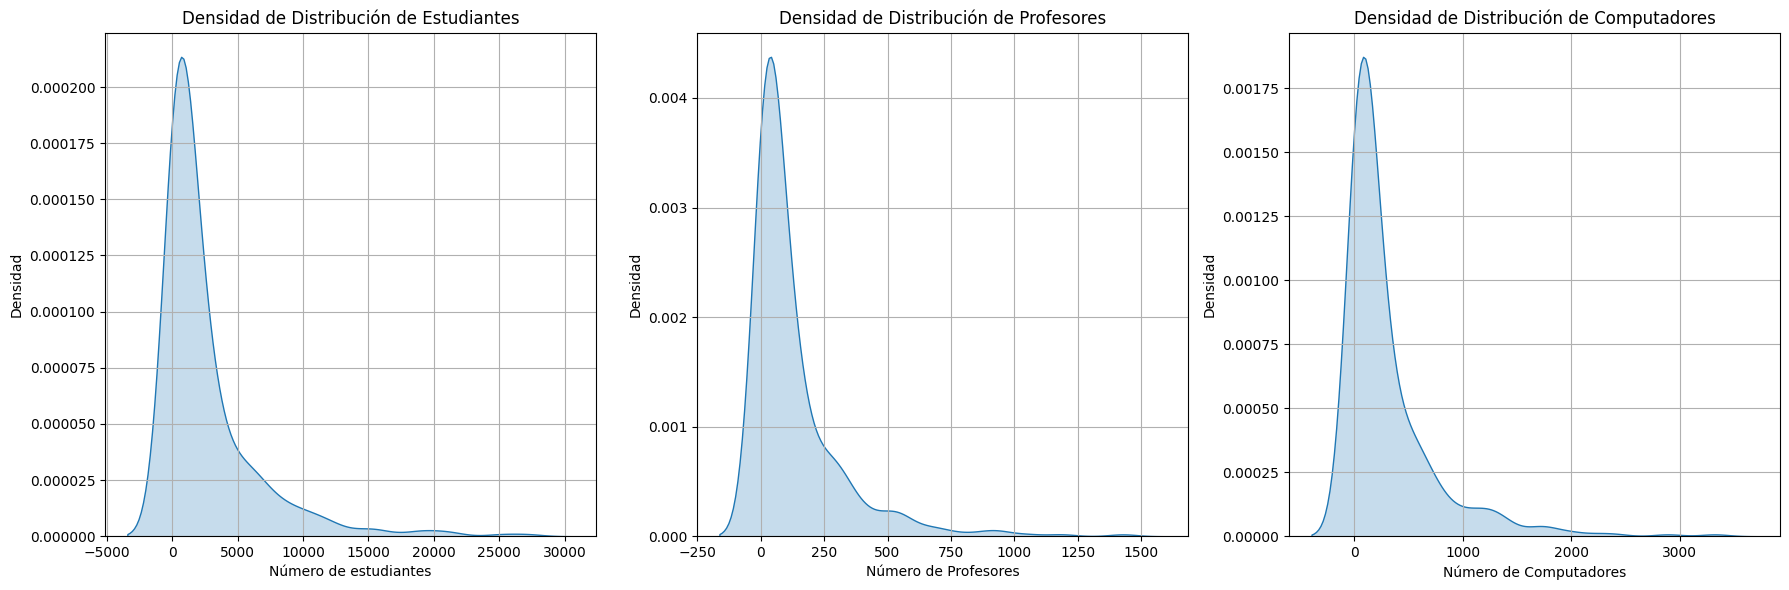

In [136]:
figura, axs = plt.subplots(1, 3, figsize=(18, 6))

sb.kdeplot(x=seleccion['students'], fill=True, ax=axs[0])
axs[0].set_title("Densidad de Distribución de Estudiantes")
axs[0].set_xlabel("Número de estudiantes")
axs[0].set_ylabel("Densidad")
axs[0].grid(True)



sb.kdeplot(x=seleccion['teachers'], fill=True, ax=axs[1])
axs[1].set_title("Densidad de Distribución de Profesores")
axs[1].set_xlabel("Número de Profesores")
axs[1].set_ylabel("Densidad")
axs[1].grid(True)



sb.kdeplot(x=seleccion['computer'], fill=True, ax=axs[2])
axs[2].set_title("Densidad de Distribución de Computadores")
axs[2].set_xlabel("Número de Computadores")
axs[2].set_ylabel("Densidad")
axs[2].grid(True)


plt.tight_layout()
plt.show()